In [1]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy
from distribuciones import espirales_anidadas
from random import sample

In [2]:
import warnings
warnings.filterwarnings("ignore")

3. Regularización: Baje el dataset Ikeda. Realice varios entrenamientos usando el 95% del archivo .data para entrenar, y el resto para validar. Realice otros entrenamientos cambiando la relación a 75%-25%, y a 50%-50%. En cada caso seleccione un resultado que considere adecuado, y genere gráficas del mse en train, validación y test. Comente sobre los resultados. 
Los otros parámetros para el entrenamiento son: learning rate 0.01, momentum 0.9, 2000 datos para testear, 400 evaluaciones del entrenamiento, cada una de 50 épocas, 30 neuronas en la capa oculta.

In [3]:
t1 = np.loadtxt('ikeda.data')
t2 = np.loadtxt('ikeda.test')

In [4]:
df_data = pd.DataFrame(t1)
df_test = pd.DataFrame(t2)

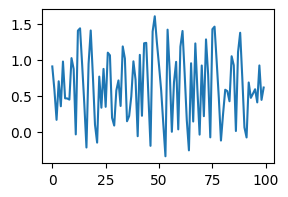

In [5]:
plt.figure(figsize=(3,2))
plt.plot(t1[:,0])

In [6]:
from sklearn.metrics import mean_squared_error

def entrenar_red(evaluaciones,red,x_train,y_train,x_val,y_val,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_val)
        #error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        error_val = (mean_squared_error(y_pred, y_val))
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    #error_test = sk.metrics.zero_one_loss(pred_test,y_test)
    error_test = (mean_squared_error(pred_test,y_test))
    pred_train = mejor_red.predict(x_train)
    #error_train = sk.metrics.zero_one_loss(pred_train,y_train)
    error_train = (mean_squared_error(pred_train,y_train))
    
    return red, error_train, min_error, error_test

In [7]:
lrate = 0.01
pmom  = 0.9
ntest = 2000
evaluaciones = 400
epocas = 50
neuronas = 30

In [8]:
#defino MLP para regresión
regr = MLPRegressor(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                    batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                    nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)

In [9]:
x_train = df_data.iloc[:95,:5]
y_train = df_data.iloc[:95,5]

x_valid = df_data.iloc[95:100,:5]
y_valid = df_data.iloc[95:100,5]

x_test = df_test.iloc[:ntest,:5]
y_test = df_test.iloc[:ntest,5]

In [10]:
red, error_train, error_val, error_test = entrenar_red(evaluaciones = 400, red = regr,  
                                                       x_train=x_train,y_train=y_train,
                                                       x_val=x_valid,y_val=y_valid,
                                                       x_test=x_test,y_test=y_test)

In [11]:
print(error_train,error_val,error_test)

0.06852728962523782 0.015459415657201572 0.11194675480688435


In [12]:
%%time

vsize = [10,20,30,40,50]
regr = MLPRegressor(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                    batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                    nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)

etrain = []
etests = []
evalid = []

for i in vsize:
    print(i)
    train_size = 100-i
    valid_size = i
    
    x_train = df_data.iloc[:train_size,:5]
    y_train = df_data.iloc[:train_size,5]

    x_valid = df_data.iloc[train_size:100,:5]
    y_valid = df_data.iloc[train_size:100,5]
    
    red, error_train, error_val, error_test = entrenar_red(evaluaciones = 400, red = regr,  
                                                       x_train=x_train,y_train=y_train,
                                                       x_val=x_valid,y_val=y_valid,
                                                       x_test=x_test,y_test=y_test)
    etrain.append(error_train)
    evalid.append(error_val)
    etests.append(error_test)

10
20
30
40
50
CPU times: user 44.3 s, sys: 1.96 s, total: 46.3 s
Wall time: 42.8 s


Text(0.5, 0, 'porcentaje validation-set')

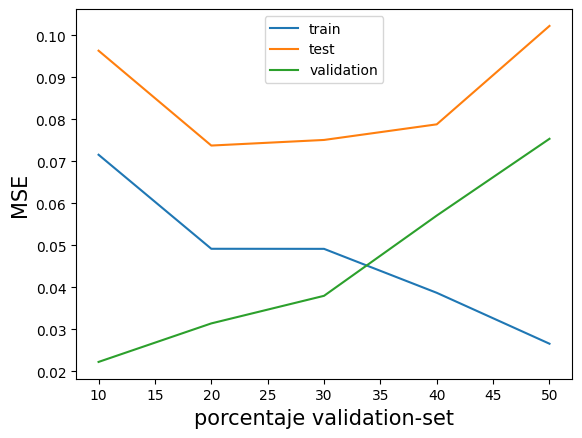

In [13]:
plt.plot(vsize,etrain,label='train')
plt.plot(vsize,etests,label='test')
plt.plot(vsize,evalid,label='validation')
plt.legend()
plt.ylabel('MSE',size=15)
plt.xlabel('porcentaje validation-set',size=15)

Entrenar con el 80% y validar con el 20% parece ser la mejor estrategia. pero porque sigue bajando el error de entrenamiento ? nunca lo sabremos..

In [43]:
regr.fit(x_train,y_train)

MLPRegressor(activation='logistic', alpha=0.0, batch_size=1,
             hidden_layer_sizes=(30,), learning_rate_init=0.01, max_iter=50,
             nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)

In [45]:
from sklearn.metrics import mean_squared_error

# Make prediction
pred = regr.predict(x_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = regr.score(x_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.015635438043964833
RMSE:  0.4806762532818995


In [47]:
test_set_rsquared

0.015635438043964833

In [58]:
red, error_train, error_val, error_test = entrenar_red(evaluaciones = 10, red = regr,  
                                                       x_train=x_train,y_train=y_train,
                                                       x_val=x_valid,y_val=y_valid,
                                                       x_test=x_test,y_test=y_test)

/home/agustin/facultad/IntroML/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
error_train
error_test
error_val

0.4806762532818995

In [38]:
df_data.iloc[:,5]

0     0.976418
1     0.464438
2     0.462873
3     0.447031
4     1.023614
        ...   
95    0.556577
96    0.437420
97    0.419920
98    1.114815
99    0.832630
Name: 5, Length: 100, dtype: float64

In [36]:
df_data

,0,1,2,3,4,5
0,0.907938,0.580088,0.165603,0.701732,0.354170,0.976418
1,0.580088,0.165603,0.701732,0.354170,0.976418,0.464438
2,0.165603,0.701732,0.354170,0.976418,0.464438,0.462873
3,0.701732,0.354170,0.976418,0.464438,0.462873,0.447031
4,0.354170,0.976418,0.464438,0.462873,0.447031,1.023614
...,...,...,...,...,...,...
95,0.590963,0.408041,0.921964,0.443131,0.614752,0.556577
96,0.408041,0.921964,0.443131,0.614752,0.556577,0.437420
97,0.921964,0.443131,0.614752,0.556577,0.437420,0.419920
98,0.443131,0.614752,0.556577,0.437420,0.419920,1.114815


In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [16]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [27]:
X.shape

(20640, 8)

In [28]:
y.shape

(20640,)